In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator





In [ ]:
!unzip '/content/drive/MyDrive/Monkey/MonkeypoxSkin.zip'

Archive:  /content/drive/MyDrive/Monkey/MonkeypoxSkin.zip
   creating: MonkeypoxSkin/Chickenpox/
  inflating: MonkeypoxSkin/Chickenpox/chickenpox1.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox10.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox100.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox101.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox102.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox103.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox104.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox105.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox106.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox107.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox11.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox12.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox13.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox14.png  
  inflating: MonkeypoxSkin/Chickenpox/chickenpox15.png  
  inflating: MonkeypoxSkin/Chickenpox/chi

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set the path to your dataset
dataset_path = '/content/MonkeypoxSkin'

# Set image parameters
image_height, image_width = 224, 224
input_shape = (image_height, image_width, 3)
num_classes = 4

In [ ]:
# Load the dataset
def load_dataset(dataset_path):
    images = []
    labels = []

    class_mapping = {'Chickenpox': 0, 'Measles': 1, 'Monkeypox': 2, 'Normal': 3}

    # Iterate over each class folder
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)

        # Load images from the class folder
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Preprocess and append the image and label
            image = tf.keras.preprocessing.image.load_img(
                image_path, target_size=(image_height, image_width)
            )
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(class_mapping[class_folder])  # Map class folder name to integer label

    return np.array(images), np.array(labels)


In [ ]:
# Load the dataset
images, labels = load_dataset(dataset_path)


In [ ]:

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(
    np.reshape(X_train, (X_train.shape[0], -1)), y_train
)
X_train = np.reshape(X_train, (X_train.shape[0], image_height, image_width, 3))

# Normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#############################Resnet######################################
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape,
    pooling='avg'
)

###############33333333333333333 the Xception model####################################

base_model = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape,
    pooling='avg'
)
################################### Inceptionv3 #########################################
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape,
    pooling='avg'
)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# Freeze the base model
base_model.trainable = False

# Add a fully connected layer on top
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])



In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=28,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20
34/34 [==============================] - 18s 167ms/step - loss: 1.4726 - accuracy: 0.2874 - val_loss: 1.2936 - val_accuracy: 0.3701
Epoch 2/20
34/34 [==============================] - 3s 102ms/step - loss: 1.3166 - accuracy: 0.3611 - val_loss: 1.2697 - val_accuracy: 0.4675
Epoch 3/20
34/34 [==============================] - 4s 108ms/step - loss: 1.2756 - accuracy: 0.4060 - val_loss: 1.2283 - val_accuracy: 0.4416
Epoch 4/20
34/34 [==============================] - 4s 106ms/step - loss: 1.2523 - accuracy: 0.3985 - val_loss: 1.2306 - val_accuracy: 0.3896
Epoch 5/20
34/34 [==============================] - 3s 103ms/step - loss: 1.2406 - accuracy: 0.3878 - val_loss: 1.1826 - val_accuracy: 0.4870
Epoch 6/20
34/34 [==============================] - 4s 104ms/step - loss: 1.2318 - accuracy: 0.3900 - val_loss: 1.1436 - val_accuracy: 0.5325
Epoch 7/20
34/34 [==============================] - 4s 110ms/step - loss: 1.2316 - accuracy: 0.3889 - val_loss: 1.1651 - val_accuracy: 0.4416
Epoch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

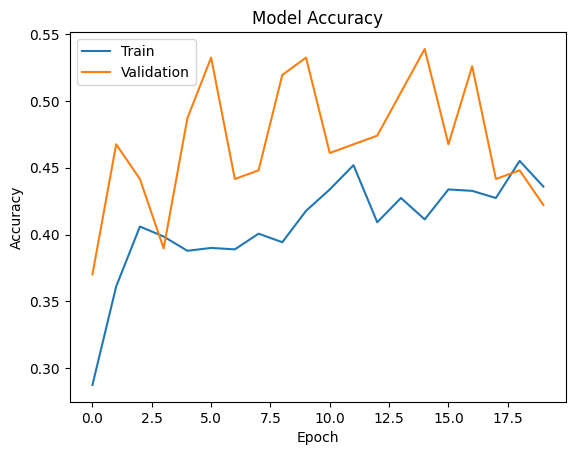

In [ ]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


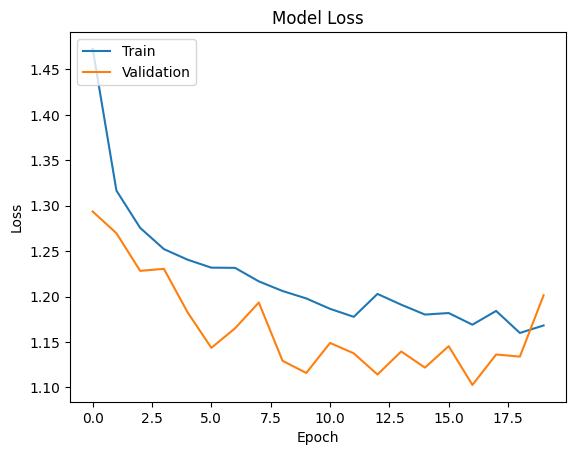

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred)
print(classification_rep)